In [ ]:
Goal: identify the various factors that may influence admission into graduate school.

Data:
admit: whether or not a applicant was admitted into graduate school
gpa: applicant's gpa
gre score :applicant's GRE score
rank: rank or prestige of an applicant's undergraduate alma mater

In [40]:
# Import tools
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import statsmodels.api as sm
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
# Read the data in
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")

In [20]:
# Preview the data
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [21]:
# Get overall info for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [22]:
 # rename the 'rank' column because there is also a DataFrame method called 'rank'
df.columns = ["admit", "gre", "gpa", "prestige"]
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [23]:
# Summary Statistics 
# Describe the data
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [24]:
# Groupby admit column
df.groupby('admit').mean()

,gre,gpa,prestige
admit,,,
0,573.186813,3.343700,2.641026
1,618.897638,3.489213,2.149606


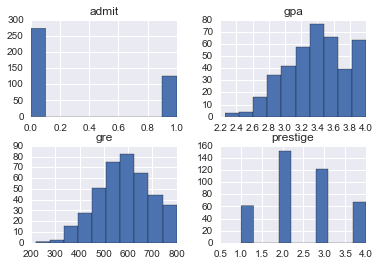

In [16]:
# histogram of all columns
admission_df.hist()
pl.show()

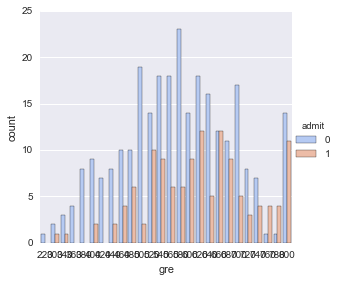

In [27]:
# Data Visualization
# Factorplot for gre with admit hue
sns.factorplot('gre',data=df,hue='admit',palette='coolwarm',kind='count')

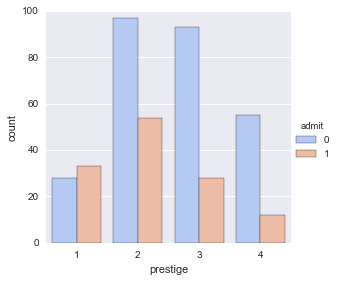

In [28]:
# Factorplot for prestige with admit hue
sns.factorplot('prestige',data=df,hue='admit',palette='coolwarm',kind='count')

In [30]:
# Data Preparation
# Create new DataFrames for the Categorical Variables
prestige_dummies = pd.get_dummies(df['prestige'])

# Create column names for the new dataframes
prestige_dummies.columns = ['pres1','pres2','pres3','pres4']
prestige_dummies.head()

,pres1,pres2,pres3,pres4
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [31]:
# Create the X and Y data sets for logistic regression
# Set X as new DataFrame without the prestige columns and the Y target
X= df.drop(['prestige','admit'],axis=1)

In [32]:
# Concat the X DataFrame with the dummy variables
X=pd.concat([X, prestige_dummies],axis=1)
X.head()

,gre,gpa,pres1,pres2,pres3,pres4
0,380,3.61,0.0,0.0,1.0,0.0
1,660,3.67,0.0,0.0,1.0,0.0
2,800,4.00,1.0,0.0,0.0,0.0
3,640,3.19,0.0,0.0,0.0,1.0
4,520,2.93,0.0,0.0,0.0,1.0


In [33]:
# Set up Y as target class
Y = df.admit
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: admit, dtype: int64

In [34]:
# Multicollinearity Consideration
# Dropping one column of each dummy variable set to avoid multicollinearity
X=X.drop('pres1',axis=1)
X.head()

,gre,gpa,pres2,pres3,pres4
0,380,3.61,0.0,1.0,0.0
1,660,3.67,0.0,1.0,0.0
2,800,4.00,0.0,0.0,0.0
3,640,3.19,0.0,0.0,1.0
4,520,2.93,0.0,0.0,1.0


In [35]:
# Flatten array
Y = np.ravel(Y)
Y

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [37]:
# Logistic Regression with SciKit Learn
# Machine learning imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ML results evaluation 
from sklearn import metrics

# Dataset import
import statsmodels.api as sm

# Create LogisticRegression model
log_model = LogisticRegression()

# Fit model
log_model.fit(X,Y)

# Check accuracy: got a 70.75% accuracy rating
log_model.score(X,Y)

0.70750000000000002

In [38]:
# Simply guessed "no admission rate": 1-31.75%=69.25%
Y.mean()

0.3175

Only 32% of the applicants was admitted, which means that we could obtain 69.25% accuracy by always predicting "no". So the logistic regression doing better than the null error rate, but not by much.

In [41]:
# Check the coefficients of our model to check what seemed to be the stronger predictors
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))
coeff_df

,0,1
0,gre,[0.00181821225176]
1,gpa,[0.243538325789]
2,pres2,[-0.605838237507]
3,pres3,[-1.17492428839]
4,pres4,[-1.3783986237]


Based on the coefficient results, admission was positively related to gpa, and negtively related to prestige rank. 

In [46]:
# Testing and Training Data Sets
# split data 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)

In [47]:
# Make a new log_model
log_model2 = LogisticRegression()

# Fit the new model
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
# Predict the classes of the testing data set
class_predict= log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
print metrics.accuracy_score(Y_test,class_predict)

0.7125
